In [1]:
import sys
sys.path.append(r"C:\Users\afeki\Desktop\code\CrossValidatedFeatureSelection\experiments")  # path contains python_file.py
from plot_utils import get_results_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
FOLDER = "C:/Users/afeki/Desktop/code/CrossValidatedFeatureSelection/experiments/gbm_classification/amazon/30FoldCV/"
fi, metrics = get_results_data(FOLDER, normalize=True, one_hot=False)

df_map = { 'gain': 'Gain', 'permutation_test' : "Permutation Test", 'permutation_train' : 'Permutation Train', 'shap_test': 'SHAP','shap_train': 'Shap Train'}
model_map = {'LGBM' : 'LGBM', 'CATBOOST' : 'CatBoost', 'Ours' : 'CVB', 'Vanilla_GBM' : 'Vanilla GBM', 'SKLEARN_MI' : 'SKLEARN Mean Imputing','XGBOOST_MI' : 'XGBOOST Mean Imputing'}
metrics['model'] = metrics['model'].map(model_map)
metrics.to_csv("metrics_summary.csv", index = None)

def translate_value_names(df):
    df['fi_type'] = df['fi_type'].map(df_map)
    df['model'] = df['model'].map(model_map)
    df.columns = ['Features', "Feature Importance Type", 'Value', 'exp','Model']
    
translate_value_names(fi)
fi.head(2)

,Features,Feature Importance Type,Value,exp,Model
0,MGR_ID,Gain,0.375247,0,LGBM
1,RESOURCE,Gain,0.127967,0,LGBM


In [3]:
feature_order = ['RESOURCE', 'MGR_ID', 'ROLE_FAMILY_DESC', 'ROLE_DEPTNAME',
       'ROLE_TITLE', 'ROLE_CODE', 'ROLE_ROLLUP_2', 'ROLE_ROLLUP_1',
       'ROLE_FAMILY']

In [4]:
models = ['Vanilla GBM', 'LGBM', 'CatBoost', 'CVB']

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

def first_paper_graph(data,title):
    fig,a =  plt.subplots(2,2, figsize=(15, 8))
    plt.subplots_adjust(wspace = 0.1, hspace = 0.53)
    counter = 0
    for i in range(2):
        for j in range(2):
            temp_model = models[counter]
            plot_data = data[(data.Model == temp_model)]
            plot_data[" "] = plot_data["Value"]
            plot_data = plot_data.set_index('Features')
            plot_data = plot_data.loc[feature_order,:].reset_index()
            ylim = 0.75
            a[i][j].set_title(temp_model)
            a[i][j].set_ylim(0,ylim)
            a[i][j].yaxis.set_label_coords(-0.2, 0.5)
            sns.barplot(x='Features', y=" ", hue="Feature Importance Type", data=plot_data, ax = a[i][j],  ci=None, color = 'w')
            a[i][j].set_xticklabels(a[i][j].get_xticklabels(), rotation=30, horizontalalignment='right')
            a[i][j].set_xlabel('')
            if temp_model != 'Ours':
                handles, labels = a[i][j].get_legend_handles_labels()
            a[i][j].legend_.remove()
#             change_width(a[i][j], .2)
            bars = a[i][j].patches
            patterns = ("o", "*", 'x','/','//','O','\\','\\\\')
            hatches = [p for p in patterns for i in range(9)]
            for bar, hatch in zip(bars, hatches):
                bar.set_hatch(hatch)
            
            
            
            counter += 1
    fig.legend(handles, labels, bbox_to_anchor = [0.9,0.88])
    fig.suptitle(title, fontsize=16)
#     fig.savefig(F"{title}.png")
    plt.show()
    
# first_paper_graph(fi[(fi["Feature Importance Type"].isin(['Gain','Permutation Test', 'Permutation Train']) )],'Amazon Feature Importance') 

C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


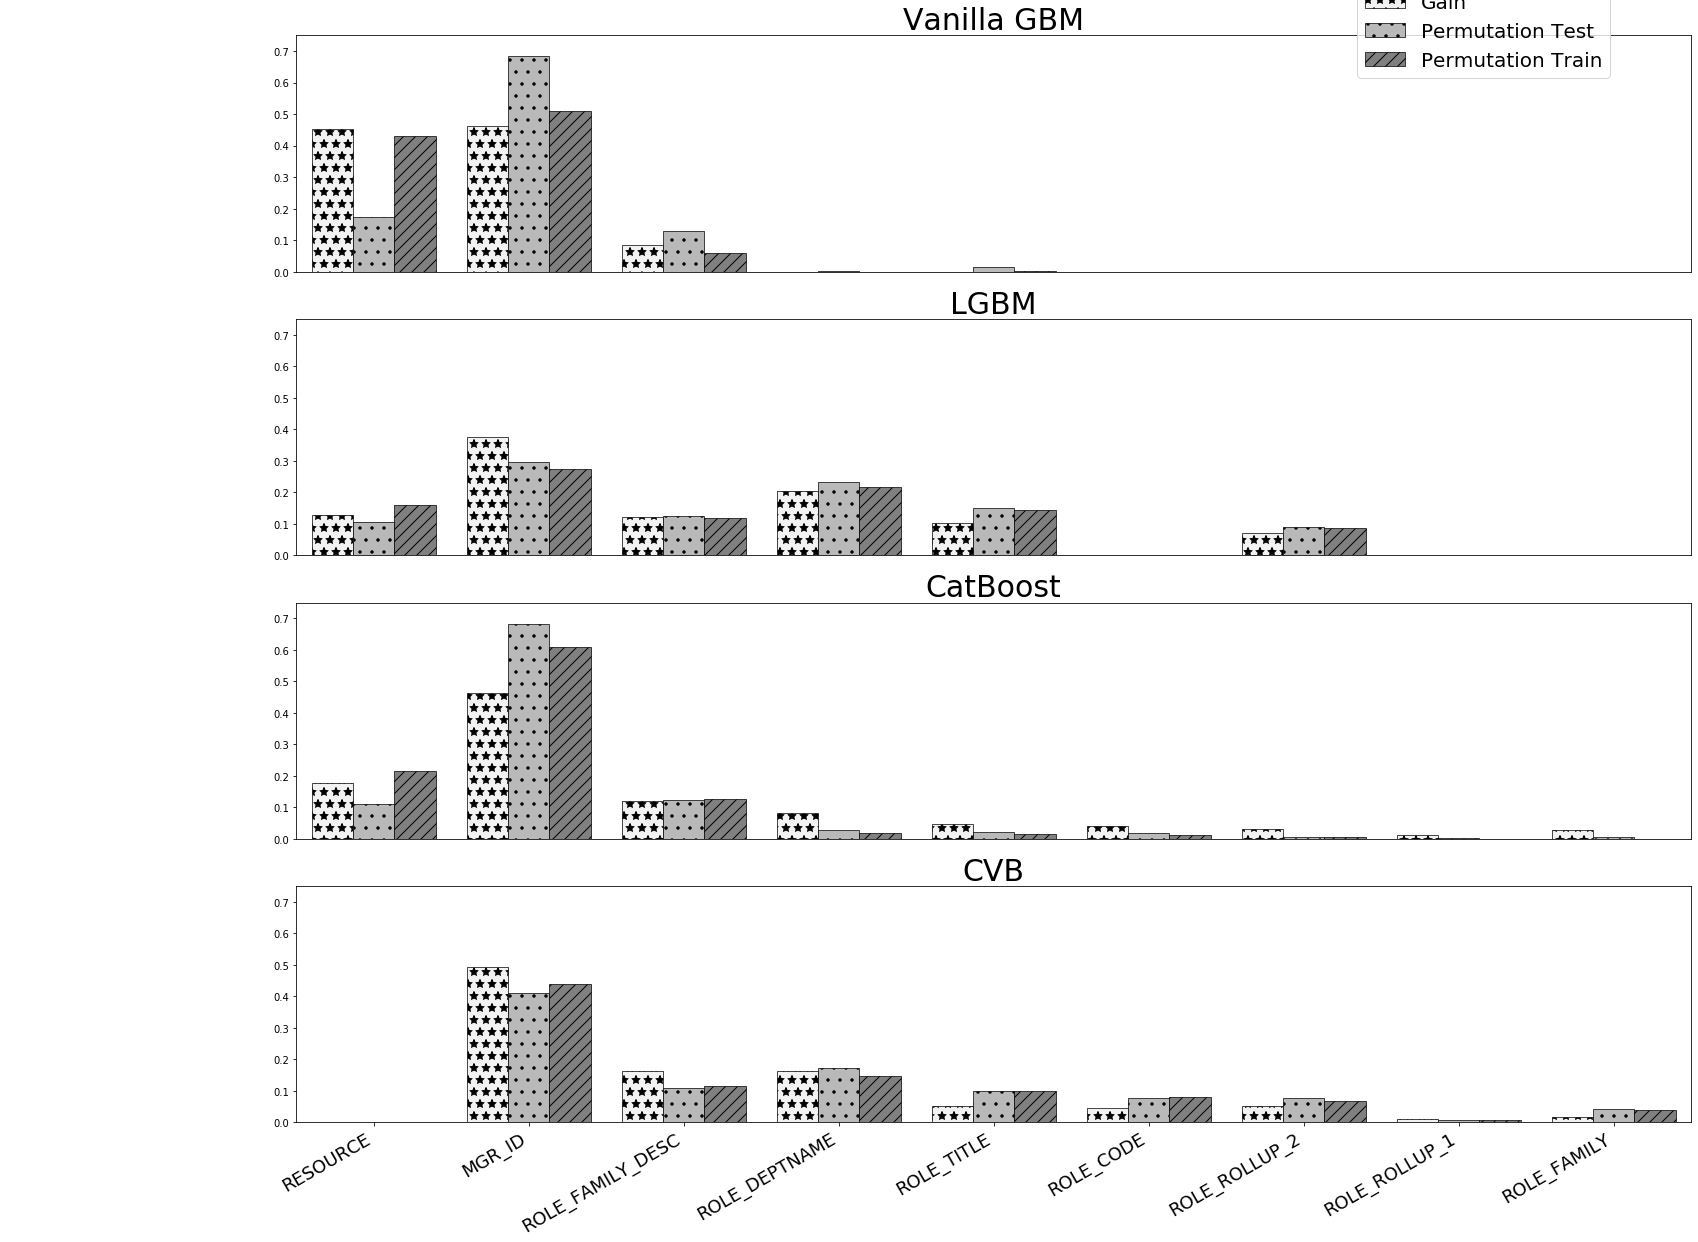

In [5]:
models = ['Vanilla GBM', 'LGBM', 'CatBoost', 'CVB']

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

def first_paper_graph(data,title):
    fig,a =  plt.subplots(4,1, figsize=(25, 20))
    plt.subplots_adjust(wspace = 0.1, hspace = 0.2)
    counter = 0
    for i in range(4):
        temp_model = models[counter]
        plot_data = data[(data.Model == temp_model)]
        plot_data[" "] = plot_data["Value"]
        plot_data = plot_data.set_index('Features')
        plot_data = plot_data.loc[feature_order,:].reset_index()
        ylim = 0.75
        a[i].set_title(temp_model, fontsize = 30)
        a[i].set_ylim(0,ylim)
        a[i].yaxis.set_label_coords(-0.2, 0.5)
        sns.barplot(x='Features', y=" ", hue="Feature Importance Type", data=plot_data, ax = a[i],  ci=None, color = 'gray')
        a[i].set_xticklabels(a[i].get_xticklabels(), rotation=30, horizontalalignment='right', fontsize = 18)

        
        
        a[i].set_xlabel('')
        if temp_model != 'CVB':
            handles, labels = a[i].get_legend_handles_labels()
        a[i].legend_.remove()
        bars = a[i].patches
        patterns = ("*",".", '//','O','\\','\\\\')
        hatches = [p for p in patterns for i in range(9)]
        for bar, hatch in zip(bars, hatches):
            bar.set_hatch(hatch)
            bar.set_edgecolor("k")
            bar.set_linewidth(0.7)
        
        if i < 3:
            a[i].set_xticks([])
            
        counter += 1
    fig.legend(handles, labels, bbox_to_anchor = [0.9,0.88],prop={'size': 20})
#     fig.suptitle(title, fontsize=32)
    fig.savefig(F"{title}.png")
    plt.show()
    
first_paper_graph(fi[(fi["Feature Importance Type"].isin(['Gain','Permutation Test', 'Permutation Train']) )],'Amazon Feature Importance') 

C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


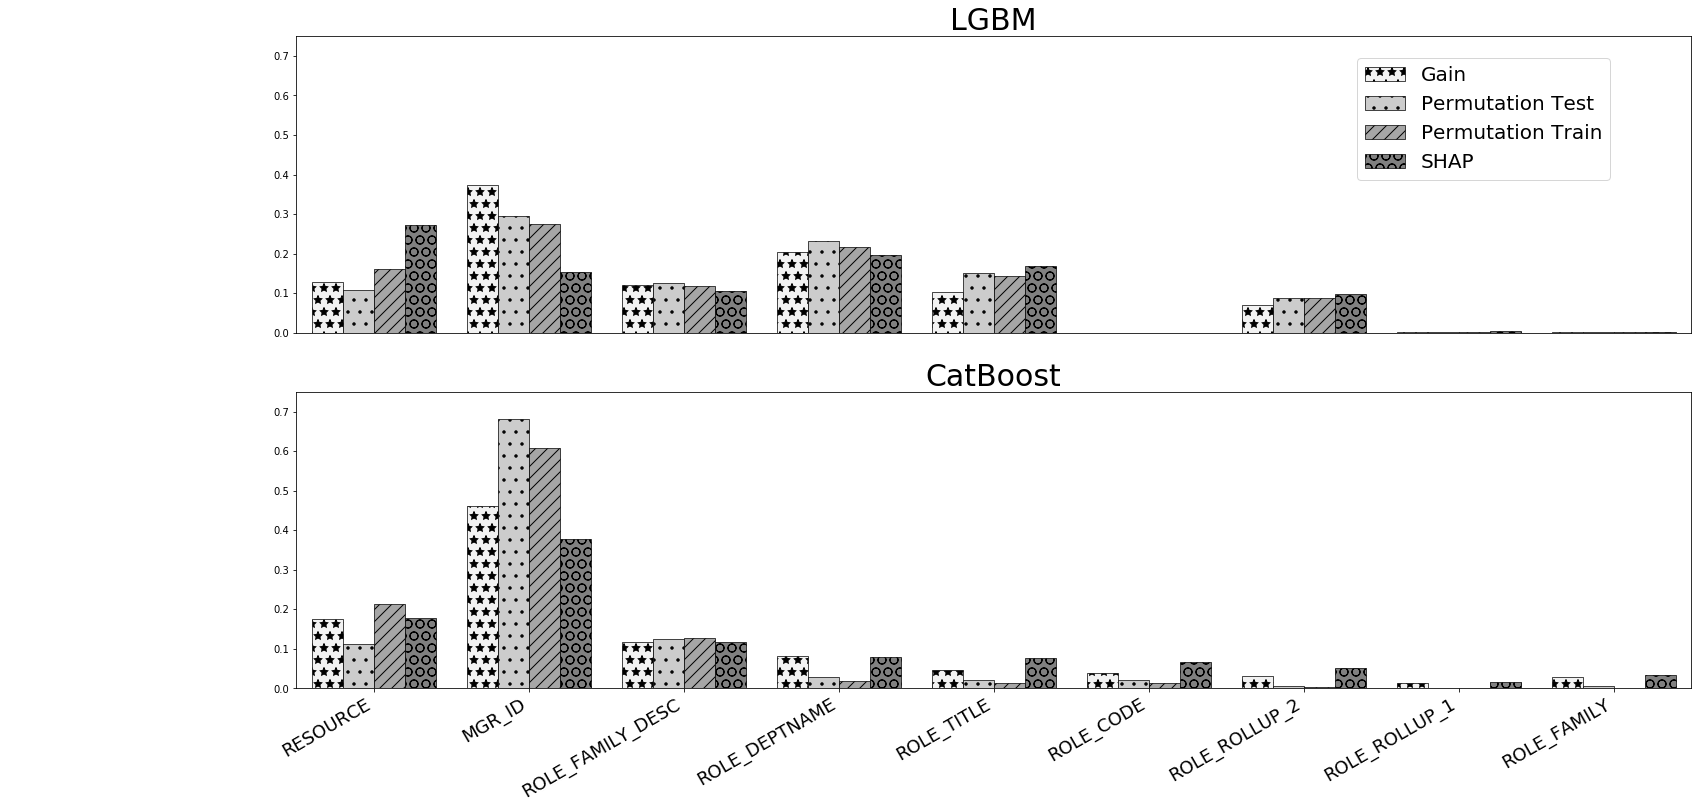

In [6]:
models = ['LGBM', 'CatBoost']

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

def first_paper_graph(data,title):
    fig,a =  plt.subplots(2,1, figsize=(25, 12))
    plt.subplots_adjust(wspace = 0.1, hspace = 0.2)
    counter = 0
    for i in range(2):
        temp_model = models[counter]
        plot_data = data[(data.Model == temp_model)]
        plot_data[" "] = plot_data["Value"]
        plot_data = plot_data.set_index('Features')
        plot_data = plot_data.loc[feature_order,:].reset_index()
        ylim = 0.75
        a[i].set_title(temp_model, fontsize = 30)
        a[i].set_ylim(0,ylim)
        a[i].yaxis.set_label_coords(-0.2, 0.5)
        sns.barplot(x='Features', y=" ", hue="Feature Importance Type", data=plot_data, ax = a[i],  ci=None, color = 'gray')
        a[i].set_xticklabels(a[i].get_xticklabels(), rotation=30, horizontalalignment='right', fontsize = 18)
        a[i].set_xlabel('')
        if temp_model != 'CVB':
            handles, labels = a[i].get_legend_handles_labels()
        a[i].legend_.remove()
        bars = a[i].patches
        patterns = ("*",".", '//','O','\\','\\\\')
        hatches = [p for p in patterns for i in range(9)]
        for bar, hatch in zip(bars, hatches):
            bar.set_hatch(hatch)
            bar.set_edgecolor("k")
            bar.set_linewidth(0.7)
        
        if i < 1:
            a[i].set_xticks([])
            
        counter += 1
    fig.legend(handles, labels, bbox_to_anchor = [0.9,0.88],prop={'size': 20})
#     fig.suptitle(title, fontsize=32)
    fig.savefig(F"{title}.png")
    plt.show()
    
first_paper_graph(fi[(fi["Feature Importance Type"].isin(['Gain','Permutation Test', 'Permutation Train', 'SHAP']) )],'Amazon Shap')

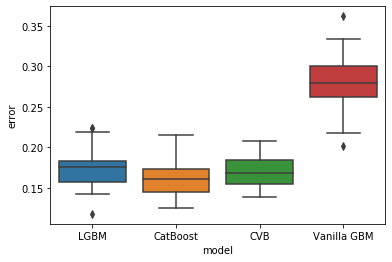

\begin{tabular}{lllll}
\toprule
model &              CVB &         CatBoost &             LGBM &      Vanilla GBM \\
\midrule
logloss &  0.1716 ± 0.0186 &  0.1606 ± 0.0216 &  0.1724 ± 0.0243 &  0.2795 ± 0.0355 \\
\bottomrule
\end{tabular}



In [7]:
models = ['Vanilla GBM', 'LGBM', 'CatBoost', 'CVB']
metrics = metrics[metrics.model.isin(models)]
sns.boxplot(x = 'model',y= 'error',data =metrics)
plt.show()

df = metrics.groupby('model')['error'].agg(['mean','std'])
df = df.round(4)
df['logloss'] = df['mean'].astype(str) + u" \u00B1 " + df['std'].astype(str)

print(df[['logloss']].T.to_latex())